In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score as sil
from sklearn.metrics import calinski_harabaz_score as ch
import numpy as np

import random

import seaborn as sns
sns.set()
%config InlineBackend.figure_format ='retina'

In [2]:
%cd ..

/Users/f.dobrykh/Development/Projects/ensemble_clustering


In [4]:
from LWEA import LWEA

In [5]:
x, _ = datasets.make_moons(n_samples=200, shuffle=True, noise=0.03, random_state=42)
df = pd.DataFrame(x).rename(columns={0:"x", 1:"y"})

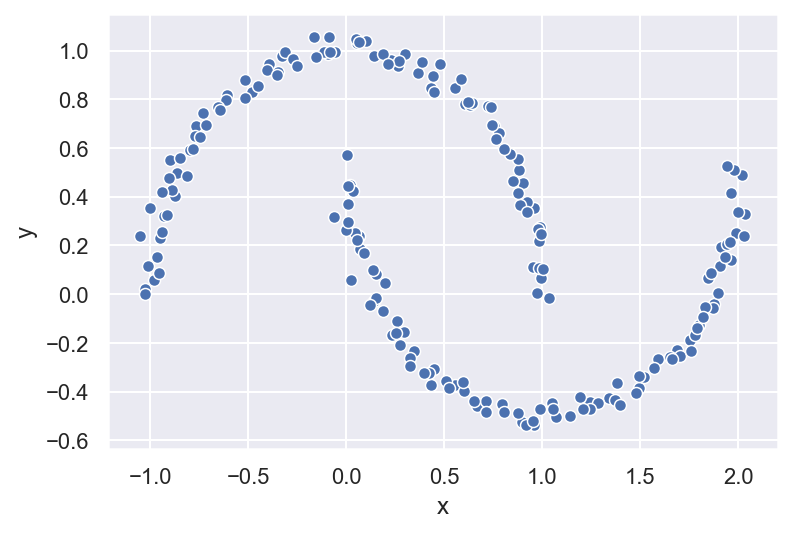

In [6]:
sns.scatterplot(df.x, df.y)

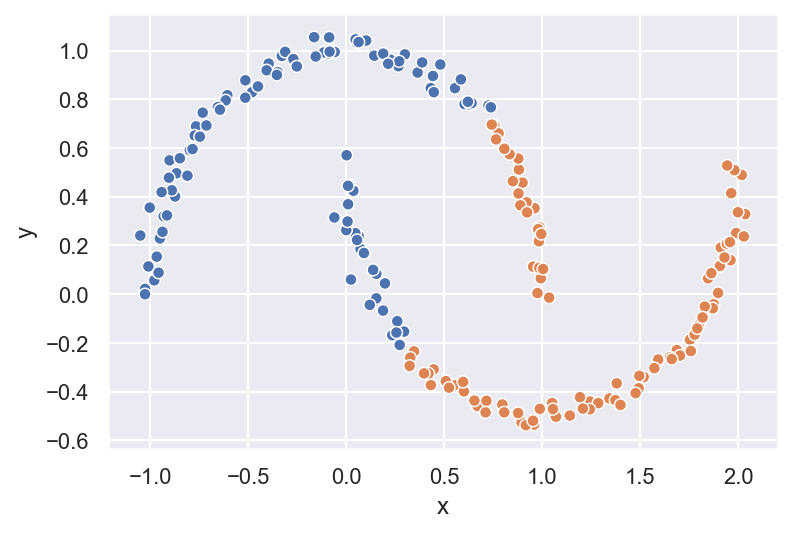

In [7]:
labels_kmeans = KMeans(n_clusters=2).fit_predict(df)
sns.scatterplot(x=df.x, y=df.y, hue=labels_kmeans, legend=False)

In [8]:
labels_ensemble = np.array([KMeans(n_clusters=5).fit_predict(df) for _ in range(20)])

In [10]:
bcs, segments = LWEA.getAllSegs(labels_ensemble.T)
ECI = LWEA.compute_ECI(bcs, segments)
ca = LWEA.compute_LWCA(segments, ECI, bcs.shape[1])

In [12]:
res = LWEA.LWEA(ca, 2)

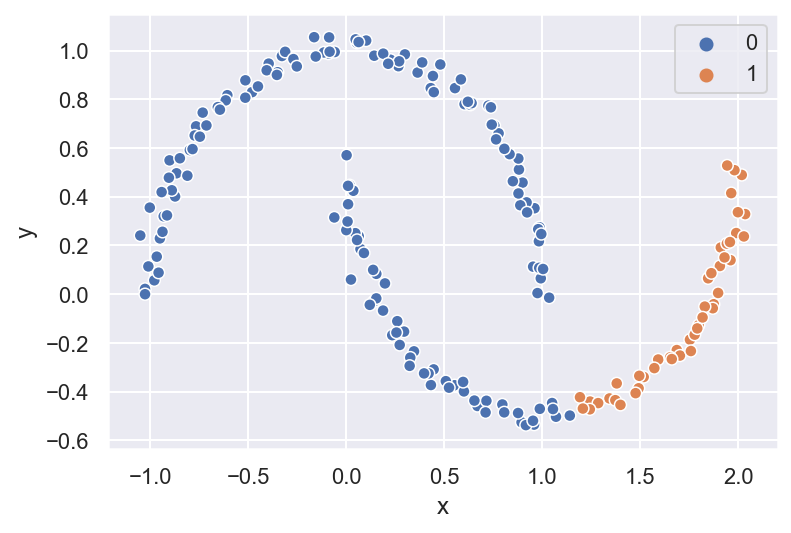

In [13]:
sns.scatterplot(df.x, df.y, hue = res)

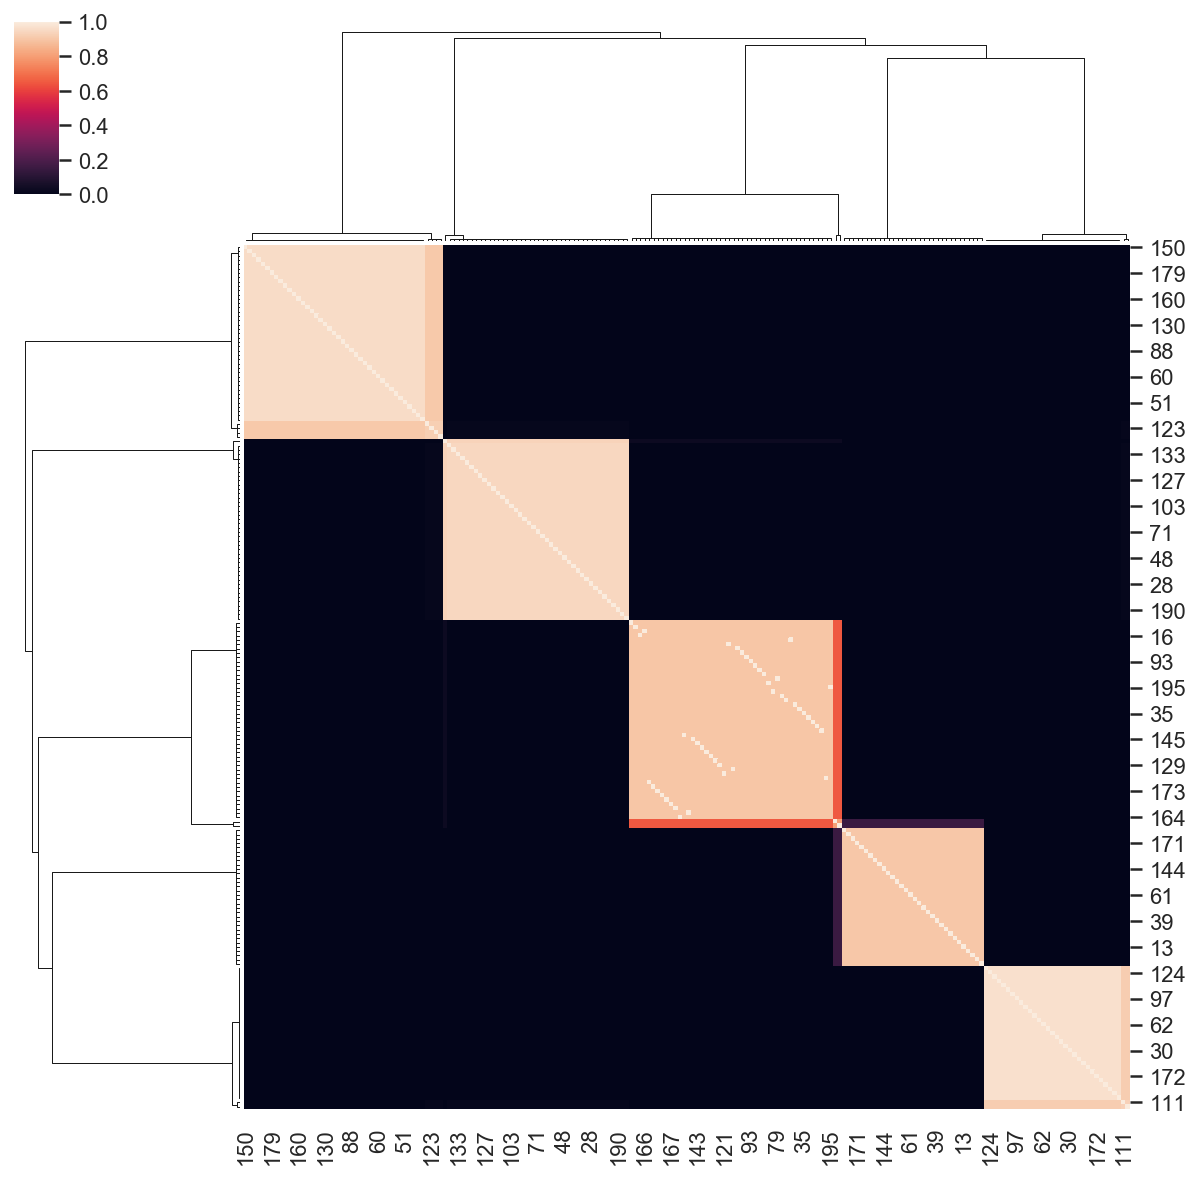

In [14]:
sns.clustermap(ca)

In [16]:
1 - ca

array([[ 0.        ,  1.        ,  1.        , ...,  0.09594257,
         1.        ,  1.        ],
       [ 1.        ,  0.        ,  0.03082422, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.03082422,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 0.09594257,  1.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ]])